In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from deep_translator import GoogleTranslator


In [189]:
iskcon = pd.read_csv('/Users/sonali/Desktop/Okstate/BAN 5743/Week11/Iskcon_data.csv')
iskcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REVIEW ID       4645 non-null   int64 
 1   SOURCE          4645 non-null   object
 2   REVIEW BY       4643 non-null   object
 3   REVIEW DATE     4645 non-null   object
 4   REVIEW MONTH    4645 non-null   object
 5   REVIEW YEAR     4645 non-null   int64 
 6   REVIEW SUBJECT  2771 non-null   object
 7   text            4645 non-null   object
 8   REVIEW RATING   4645 non-null   int64 
 9   REVIEW TYPE     4645 non-null   object
dtypes: int64(3), object(7)
memory usage: 363.0+ KB


In [190]:
iskcon['text'][[1,3,5,6,9,10]]

1     " Wow ! What a beautiful place " Iscon temple ...
3     "Hare Rama Hare Rama Rama Rama Hare Hare, Hare...
5     "Management system is nice.., each time we vis...
6     "The discipline, cleanliness and the ambiance ...
9     . MAINTENANCE SUPERB. Feel like you are in the...
10    ...iskcon dwarka ......Yaha mandir k andar bhi...
Name: text, dtype: object

In [147]:
iskcon['text_translated'] = iskcon['text'].apply(lambda x : GoogleTranslator(source='auto', target='en').translate(x))


In [201]:
iskcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REVIEW ID       4645 non-null   int64 
 1   SOURCE          4645 non-null   object
 2   REVIEW BY       4643 non-null   object
 3   REVIEW DATE     4645 non-null   object
 4   REVIEW MONTH    4645 non-null   object
 5   REVIEW YEAR     4645 non-null   int64 
 6   REVIEW SUBJECT  2771 non-null   object
 7   text            4645 non-null   object
 8   REVIEW RATING   4645 non-null   int64 
 9   REVIEW TYPE     4645 non-null   object
dtypes: int64(3), object(7)
memory usage: 363.0+ KB


In [204]:
iskcon.to_csv('/Users/sonali/Desktop/Okstate/BAN 5743/iskcon_translated.csv')


In [283]:
translated = pd.read_csv('/Users/sonali/Desktop/Okstate/BAN 5743/Week11/iskcon_translated.csv')
translated['text_translated'][[942]]

942    Good
Name: text_translated, dtype: object

In [252]:
translated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4644 entries, 0 to 4644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4644 non-null   int64 
 1   REVIEW ID        4644 non-null   int64 
 2   SOURCE           4644 non-null   object
 3   REVIEW BY        4642 non-null   object
 4   REVIEW DATE      4644 non-null   object
 5   REVIEW MONTH     4644 non-null   object
 6   REVIEW YEAR      4644 non-null   int64 
 7   REVIEW SUBJECT   2771 non-null   object
 8   text             4644 non-null   object
 9   REVIEW RATING    4644 non-null   int64 
 10  REVIEW TYPE      4644 non-null   object
 11  text_translated  4644 non-null   object
dtypes: int64(4), object(8)
memory usage: 600.7+ KB


In [284]:
translated.dropna(subset='text_translated', axis=0,inplace=True)

In [285]:
translated['text_translated'] = translated['text_translated'].apply(lambda x : " ".join(x.lower() for x in x.split()))
patterndigits = '\\b[0-9]+\\b'
translated['text_translated'] = translated['text_translated'].str.replace(patterndigits,'')
patternpunc = '[^\w\s]'
translated['text_translated'] = translated['text_translated'].str.replace(patternpunc,'')
stop = stopwords.words('hinglish')
translated['text_translated'] = translated['text_translated'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
lemma = WordNetLemmatizer()
translated['text_translated'] = translated['text_translated'].apply(lambda x: " ".join(lemma.lemmatize(x) for x in x.split()))
translated['text_translated'][[1,3,5,6,9,10]]

/var/folders/1q/qj77hns50_n2lj1c72ffdt9r0000gn/T/ipykernel_28488/3188112865.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  translated['text_translated'] = translated['text_translated'].str.replace(patterndigits,'')
/var/folders/1q/qj77hns50_n2lj1c72ffdt9r0000gn/T/ipykernel_28488/3188112865.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  translated['text_translated'] = translated['text_translated'].str.replace(patternpunc,'')


1     wow beautiful place iscon temple ambiance temp...
3     hare rama hare rama rama rama hare hare hare k...
5     management system nice time visit temple enjoy...
6            discipline cleanliness ambiance maintained
9     maintenance superb feel hill peaceful atmosphe...
10    iskcon dwarka mandir aandar stall laga prasad ...
Name: text_translated, dtype: object

In [211]:
iskcon['text'] = iskcon['text'].apply(lambda x : " ".join(x.lower() for x in x.split()))
patterndigits = '\\b[0-9]+\\b'
iskcon['text'] = iskcon['text'].str.replace(patterndigits,'')
patternpunc = '[^\w\s]'
iskcon['text'] = iskcon['text'].str.replace(patternpunc,'')
stop = stopwords.words('hinglish')
iskcon['text'] = iskcon['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
lemma = WordNetLemmatizer()
iskcon['text'] = iskcon['text'].apply(lambda x: " ".join(lemma.lemmatize(x) for x in x.split()))

/var/folders/1q/qj77hns50_n2lj1c72ffdt9r0000gn/T/ipykernel_28488/760274138.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  iskcon['text'] = iskcon['text'].str.replace(patterndigits,'')
/var/folders/1q/qj77hns50_n2lj1c72ffdt9r0000gn/T/ipykernel_28488/760274138.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  iskcon['text'] = iskcon['text'].str.replace(patternpunc,'')


In [286]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer_trans = CountVectorizer()

In [297]:
trans_token = pd.DataFrame(vectorizer_trans.fit_transform(translated['text_translated']).toarray(), columns=vectorizer_trans.get_feature_names())
print(trans_token.columns.tolist())
sort_text_trans = trans_token.sum()
sort_text_trans.sort_values(ascending = False).head()


['00am', '00pm', '100', '1000rupee', '1000th', '100rs', '105rs', '10rupees', '11am', '12us', '13th', '14th', '150add', '15am', '15am1pm', '15pm', '15yrs', '17m', '1990s', '1997th', '19th', '1hr', '1nce', '1off', '1pm', '1st', '1stcrowd', '2030hrs', '20pm', '20th', '25th', '26th', '29th', '2hours', '2hrs', '2nd', '2pm', '300inr', '300r', '300rupee', '30am', '30km', '30pm', '30rs', '30th', '30us', '3a', '3d', '3hrs', '3km', '3o', '3pmif', '3rd', '400rs', '40min', '40rs', '45mins', '4am', '4d', '4pm', '4th', '4ths', '50rs', '56bhog', '5am', '5hrs', '5km', '5m', '5pm', '5star', '5th', '6pm', '6th', '78e78a19e', '7d', '7pm', '7th', '8am', '8pm', '90', '9pm', '9th', '__', 'aa', 'aaarti', 'aagama', 'aage', 'aahe', 'aandar', 'aaradhya', 'aarathi', 'aarathy', 'aarati', 'aaratis', 'aart', 'aarthi', 'aarthipooja', 'aarti', 'aartiits', 'aartis', 'aback', 'abbreviation', 'abgeebn', 'abhay', 'abhishake', 'abhishek', 'abhisheka', 'abhishekam', 'abhishekham', 'abide', 'ability', 'abode', 'abondoned', 

/Users/sonali/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


temple     4715
place      2695
krishna    1797
visit      1700
hare       1305
dtype: int64

In [ ]:


tokens_data = pd.DataFrame(vectorizer.fit_transform(iskcon['text']).toarray(), columns=vectorizer.get_feature_names())
print(tokens_data.columns.tolist())
sort_text = tokens_data.sum()
sort_text.sort_values(ascending = False).head(50)


In [253]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 4
plot_size[1] = 3
plt.rcParams["figure.figsize"] = plot_size

In [ ]:
translated['REVIEW YEAR'].value_counts().plot(kind='bar', title='Comments by Review Year')

In [ ]:
translated['REVIEW RATING'].value_counts().plot(kind='bar', title='Comments by Reviewer Rating ')


In [ ]:
translated['REVIEW TYPE'].value_counts().plot(kind='bar', title='Comments by Review Type')


In [ ]:
rating = translated.groupby(['REVIEW YEAR', 'REVIEW RATING'])['REVIEW RATING'].count().unstack()

rating.plot(kind='bar',title='Comments by Year and Review Rating',xlabel="")

In [ ]:
translated.SOURCE.value_counts().plot(kind='bar', title='Comments by Source')


In [214]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [215]:
vectorizer_trans = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
doc_term_matrix_trans = vectorizer_trans.fit_transform(translated['text_translated'].values.astype('U'))
doc_term_matrix_trans.shape

(4644, 978)

In [216]:
LDA_trans = LatentDirichletAllocation(n_components=5, random_state=35)
LDA_trans.fit(doc_term_matrix_trans)

LatentDirichletAllocation(n_components=5, random_state=35)

In [217]:
for i,topic in enumerate(LDA_trans.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer_trans.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['shopping', 'time', 'inside', 'clean', 'bangalore', 'nice', 'food', 'visit', 'place', 'temple']


Top 10 words for topic #1:
['queue', 'lot', 'parking', 'book', 'inside', 'visit', 'time', 'darshan', 'food', 'temple']


Top 10 words for topic #2:
['mind', 'feel', 'lord', 'peaceful', 'krishna', 'nice', 'temple', 'peace', 'visit', 'place']


Top 10 words for topic #3:
['visited', 'city', 'sri', 'lord', 'beautiful', 'visit', 'krishna', 'bangalore', 'iskcon', 'temple']


Top 10 words for topic #4:
['radhe', 'mantra', 'lord', 'temple', 'chant', 'ram', 'chanting', 'rama', 'krishna', 'hare']




/Users/sonali/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [198]:
topic_values_trans = LDA_trans.transform(doc_term_matrix_trans)
topic_values_trans.shape
translated['topic_LDA'] = topic_values_trans.argmax(axis=1)
translated.head()


,Unnamed: 0,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW MONTH,REVIEW YEAR,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,text_translated,topic_LDA
0,0,2846,Facebook,Mathi Maddy,7/12/2015,July,2015,NaN,!!!!!!!!!!!!!!!Awesome! !!!!!!!!!!!!!! I ever ...,5,POSITIVE,awesome krishna temple lik,2
1,1,3806,Google + HK HILL,Vinayak H.p,12/8/2016,December,2016,NaN,""" Wow ! What a beautiful place "" Iscon temple ...",5,POSITIVE,wow beautiful place iscon temple ambiance temp...,3
2,2,3881,Trip Advisor,ganeshkamath,12/19/2016,December,2016,Visit to Abode of Almighty,"""A must visit"" place for all those who live in...",5,POSITIVE,visit place live bangalore visit city abode al...,2
3,3,4043,Facebook,Vishwa Rastapur,1/10/2017,January,2017,NaN,"""Hare Rama Hare Rama Rama Rama Hare Hare, Hare...",5,POSITIVE,hare rama hare rama rama rama hare hare hare k...,4
4,4,3954,Facebook,Shruthi Sukruti,1/2/2017,January,2017,NaN,"""Management system is nice.., each time we vis...",5,POSITIVE,management system nice time visit temple enjoy...,0


In [218]:
vectorizer = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(iskcon['text'].values.astype('U'))
doc_term_matrix.shape

(4645, 974)

In [219]:
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=35)

In [220]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['clean', 'maintained', 'time', 'peaceful', 'beautiful', 'bangalore', 'nice', 'visit', 'place', 'temple']


Top 10 words for topic #1:
['visited', 'lord', 'bangalore', 'sri', 'time', 'visit', 'inside', 'krishna', 'iskcon', 'temple']


Top 10 words for topic #2:
['great', 'mind', 'god', 'spiritual', 'experience', 'temple', 'peace', 'feel', 'visit', 'place']


Top 10 words for topic #3:
['day', 'book', 'restaurant', 'darshan', 'lot', 'available', 'visit', 'place', 'food', 'temple']


Top 10 words for topic #4:
['radha', 'ram', 'chant', 'chanting', 'temple', 'place', 'lord', 'rama', 'hare', 'krishna']




In [118]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape
iskcon['topic_LDA'] = topic_values.argmax(axis=1)
iskcon.head()



,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW MONTH,REVIEW YEAR,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,topic_LDA
0,2846,Facebook,Mathi Maddy,7/12/2015,July,2015,NaN,!!!!!!!!!!!!!!!Awesome! !!!!!!!!!!!!!! I ever ...,5,POSITIVE,3
1,3806,Google + HK HILL,Vinayak H.p,12/8/2016,December,2016,NaN,""" Wow ! What a beautiful place "" Iscon temple ...",5,POSITIVE,0
2,3881,Trip Advisor,ganeshkamath,12/19/2016,December,2016,Visit to Abode of Almighty,"""A must visit"" place for all those who live in...",5,POSITIVE,0
3,4043,Facebook,Vishwa Rastapur,1/10/2017,January,2017,NaN,"""Hare Rama Hare Rama Rama Rama Hare Hare, Hare...",5,POSITIVE,3
4,3954,Facebook,Shruthi Sukruti,1/2/2017,January,2017,NaN,"""Management system is nice.., each time we vis...",5,POSITIVE,2


In [185]:
tfidf_vect_trans = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

doc_term_matrix2_trans = tfidf_vect_trans.fit_transform(translated['text_translated'].values.astype('U'))
doc_term_matrix2_trans.shape

(4644, 978)

In [187]:
nmf_trans = NMF(n_components=5, random_state=35)
nmf_trans.fit(doc_term_matrix2_trans)

NMF(n_components=5, random_state=35)

In [188]:
for i,topic in enumerate(nmf_trans.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect_trans.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['visited', 'maintained', 'clean', 'lord', 'inside', 'krishna', 'food', 'iskcon', 'beautiful', 'temple']


Top 10 words for topic #1:
['sri', 'radha', 'feel', 'chant', 'chanting', 'ram', 'lord', 'rama', 'krishna', 'hare']


Top 10 words for topic #2:
['beautiful', 'calm', 'love', 'mind', 'spiritual', 'great', 'awesome', 'peace', 'peaceful', 'place']


Top 10 words for topic #3:
['devotional', 'enjoyed', 'visit', 'location', 'family', 'food', 'view', 'place', 'temple', 'nice']


Top 10 words for topic #4:
['architecture', 'tourist', 'evening', 'worth', 'family', 'city', 'iskcon', 'time', 'bangalore', 'visit']




/Users/sonali/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [199]:
topic_values2_trans = nmf_trans.transform(doc_term_matrix2_trans)
translated['topic_NMF'] = topic_values2_trans.argmax(axis=1)
translated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4644 entries, 0 to 4644
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4644 non-null   int64 
 1   REVIEW ID        4644 non-null   int64 
 2   SOURCE           4644 non-null   object
 3   REVIEW BY        4642 non-null   object
 4   REVIEW DATE      4644 non-null   object
 5   REVIEW MONTH     4644 non-null   object
 6   REVIEW YEAR      4644 non-null   int64 
 7   REVIEW SUBJECT   2771 non-null   object
 8   text             4644 non-null   object
 9   REVIEW RATING    4644 non-null   int64 
 10  REVIEW TYPE      4644 non-null   object
 11  text_translated  4644 non-null   object
 12  topic_LDA        4644 non-null   int64 
 13  topic_NMF        4644 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 673.3+ KB


In [186]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

doc_term_matrix2 = tfidf_vect.fit_transform(iskcon['text'].values.astype('U'))
doc_term_matrix2.shape

(4645, 974)

In [120]:
nmf = NMF(n_components=5, random_state=35)
nmf.fit(doc_term_matrix2)

NMF(n_components=5, random_state=35)

In [121]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['inside', 'lord', 'like', 'food', 'krishna', 'visit', 'iskcon', 'bangalore', 'beautiful', 'temple']


Top 10 words for topic #1:
['sri', 'radha', 'feel', 'chant', 'chanting', 'lord', 'ram', 'rama', 'krishna', 'hare']


Top 10 words for topic #2:
['neat', 'location', 'enjoyed', 'environment', 'really', 'food', 'view', 'temple', 'place', 'nice']


Top 10 words for topic #3:
['mind', 'spiritual', 'love', 'great', 'bangalore', 'awesome', 'peace', 'peaceful', 'visit', 'place']


Top 10 words for topic #4:
['architecture', 'location', 'really', 'clean', 'temple', 'atmosphere', 'maintenance', 'environment', 'food', 'good']




/Users/sonali/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [136]:
topic_values2 = nmf.transform(doc_term_matrix2)
iskcon['topic_NMF'] = topic_values2.argmax(axis=1)
iskcon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4645 entries, 0 to 4644
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REVIEW ID       4645 non-null   int64 
 1   SOURCE          4645 non-null   object
 2   REVIEW BY       4643 non-null   object
 3   REVIEW DATE     4645 non-null   object
 4   REVIEW MONTH    4645 non-null   object
 5   REVIEW YEAR     4645 non-null   int64 
 6   REVIEW SUBJECT  2771 non-null   object
 7   text            4645 non-null   object
 8   REVIEW RATING   4645 non-null   int64 
 9   REVIEW TYPE     4645 non-null   object
 10  topic_LDA       4645 non-null   int64 
 11  topic_NMF       4645 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 435.6+ KB


In [137]:
iskcon.to_csv('/Users/sonali/Desktop/Okstate/BAN 5743/Week11/iskcon_topics')

In [200]:
translated.to_csv('/Users/sonali/Desktop/Okstate/BAN 5743/Week11/translated_topics.csv')

In [ ]:
translated_topics = pd.read_csv('/Users/sonali/Desktop/Okstate/BAN 5743/Week11/translated_topics.csv')
translated_topics.info()

<AxesSubplot: title={'center': 'Comments by Topic'}>

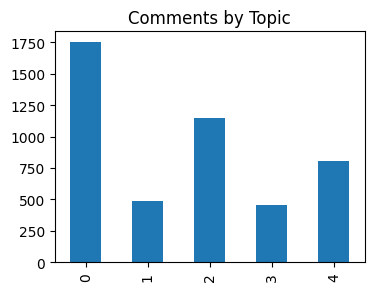

In [280]:
translated_topics['topic_NMF'].value_counts().sort_index().plot(kind='bar',title='Comments by Topic')


<AxesSubplot: title={'center': 'Comments by Year and Topic'}>

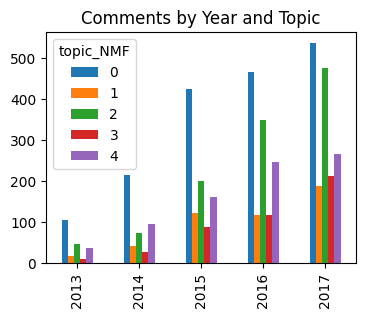

In [281]:
trend = translated_topics.groupby(['REVIEW YEAR', 'topic_NMF'])['topic_NMF'].count().unstack()

trend.plot(kind='bar',title='Comments by Year and Topic',xlabel="")